# Group Presentation 5

## Group 4 Members

* Shyam Akhil Nekkanti - 8982123
* Jun He (Helena) - 8903073
* Zheming Li (Brendan) - 8914152

### Field of Inquiry: **YouTube Video Metrics**

### Research Question: **What factors most significantly impact the views of a YouTube video?**

### Dataset Description

The dataset contains information about trending YouTube videos across different countries, including the US, Canada, Germany, and others. It includes various attributes such as video title, channel title, publication date, trending date, views, likes, dislikes, comments, and tags.  It also has categorical data like video category and whether the video includes a thumbnail.

The dataset allow us to explore patterns in video performance and understand what factors may contribute to a video becoming trending, such as engagement metrics or metadata.


## Data Cleaning and Preparation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.model_selection import train_test_split

In [9]:
# Load the data
file_path = "youtube-dataset/USvideos.csv"
data = pd.read_csv(file_path)

# Inspect data
print(data.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

### Define classes and methods

In [ ]:
import pandas as pd
import json


def load_json(file_path):
  """
  Load JSON data from a file
  :param file_path: path to the JSON file
  :return: JSON data
  """

  with open(file_path, 'r') as file:
    data = json.load(file)
  return data


def convert_raw_categories_to_dict(raw_categories):
  """
  Convert raw categories data to a dictionary
  :param raw_categories: raw categories data
  :return: categories dictionary
  """

  categories_dict = {}

  for item in raw_categories['items']:
    categories_dict[int(item['id'])] = item['snippet']['title']

  return categories_dict


class VideoAnalysis:
  """
  A class to explore the YouTube trending videos dataset
  """
  
  def __init__(self, file_path):
    self.df = pd.read_csv(file_path)

  # Method to explore the dataset
  def explore_data(self):
    """
    Explore the dataset by displaying column names and summary statistics
    :return: None
    """

    print("Column Names:", self.df.columns)
    print("Dataset Summary:\n", self.df.describe())

  def data_clean(self):
    """
    Handle missing values.
  Convert categorical data into dummy variables.
  Convert date fields into Julian dates."""
    data = self.df.dropna()
    # Convert date to Julian
    data['publish_date'] = pd.to_datetime(data['publish_time']).dt.date
    data['julian_date'] = data['publish_date'].apply(lambda x: x.toordinal())

    # Convert categorical columns to dummies
    categorical_columns = ['category_id']
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    return self.data

  def data_transformation(self):
    """
    Box-Cox Transformation: For skewed data like views or likes.
    Tukey's Ladder: Apply if needed for outliers.
    """
    # Box-Cox Transformation on 'views'
    self.df['views_bc'], _ = boxcox(self.df['views'] + 1)

    # Tukey's Ladder on 'likes'
    self.df['likes_tukey'], _ = yeojohnson(self.df['likes'] + 1)
    return self.df
  


### Exploratory Data Analysis (EDA)

In [18]:
# Create an instance of the class
file_path = 'youtube-dataset/USvideos.csv'
video_analysis = VideoAnalysis(file_path)

# Call the method to explore the dataset
video_analysis.explore_data()

Column Names: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
Dataset Summary:
         category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+0

C:\Users\xll12\AppData\Local\Temp\ipykernel_19208\2732134395.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['publish_date'] = pd.to_datetime(data['publish_time']).dt.date
C:\Users\xll12\AppData\Local\Temp\ipykernel_19208\2732134395.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['julian_date'] = data['publish_date'].apply(lambda x: x.toordinal())


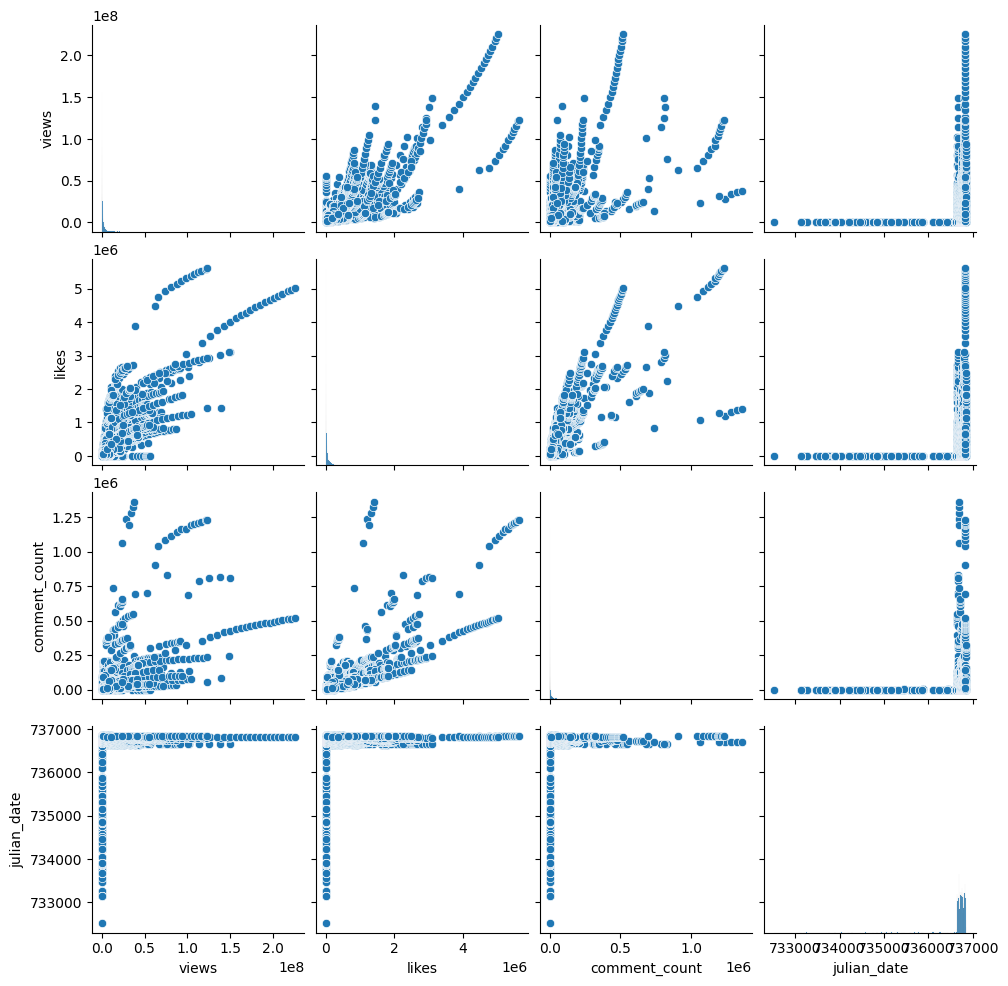

In [21]:

data = video_analysis.data_clean()
data = video_analysis.data_transformation()

data['publish_date'] = pd.to_datetime(data['publish_time']).dt.date
data['julian_date'] = data['publish_date'].apply(lambda x: x.toordinal())

# Pairplot for EDA
sns.pairplot(data[['views', 'likes', 'comment_count', 'julian_date']])
plt.show()



 # Simple Linear Regression (SLR) - Predict views using other metrics as independent variables.

In [28]:
# Define features and target
X = data[['likes']]
y = data['views_bc']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R-Squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(f"SLR Intercept: {model.intercept_}")
print(f"SLR Slope: {model.coef_[0]}")

R-Squared: 0.25997925193484206
Mean Squared Error: 11.281855791426525
SLR Intercept: 20.37085296739154
SLR Slope: 8.489538777364216e-06


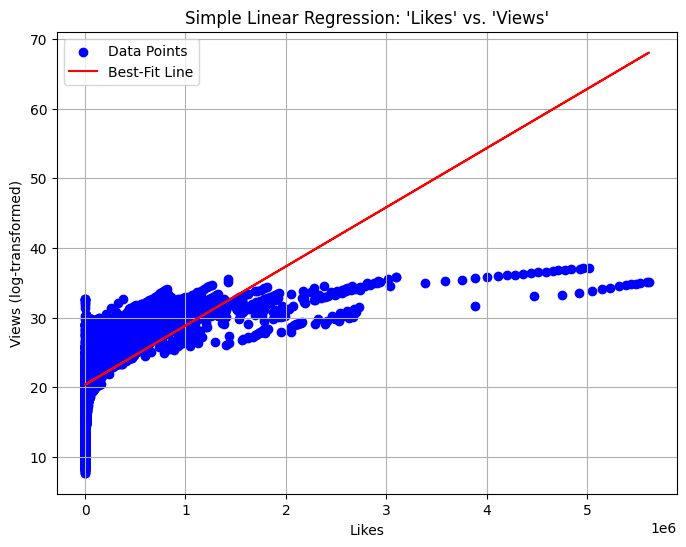

In [31]:
# Plot the data and the best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Best-Fit Line')
plt.xlabel('Likes')
plt.ylabel('Views (log-transformed)')
plt.title("Simple Linear Regression: 'Likes' vs. 'Views'")
plt.legend()
plt.grid(True)
plt.show()

# Multiple Linear Regression (MLR) - with 'likes', 'comment_count', 'julian_date'


In [33]:
# Define the predictor and response variables
X_mlr = data[['likes', 'comment_count', 'julian_date']].values  
# Multiple predictor variables
y = data['views_bc'].values  
# Response variable

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_mlr, y)
 

#  Predictions for MLR
y_mlr = mlr_model.predict(X_mlr)
print(f"MLR Intercept: {mlr_model.intercept_}")
print(f"MLR Coefficients: {mlr_model.coef_}")
print(f"MLR R² Score: {r2_score(y, y_mlr):.2f}")

MLR Intercept: -4033.8654022188007
MLR Coefficients: [ 1.05341889e-05 -1.65312010e-05  5.50295782e-03]
MLR R² Score: 0.32


# Visualize MLR Predictions

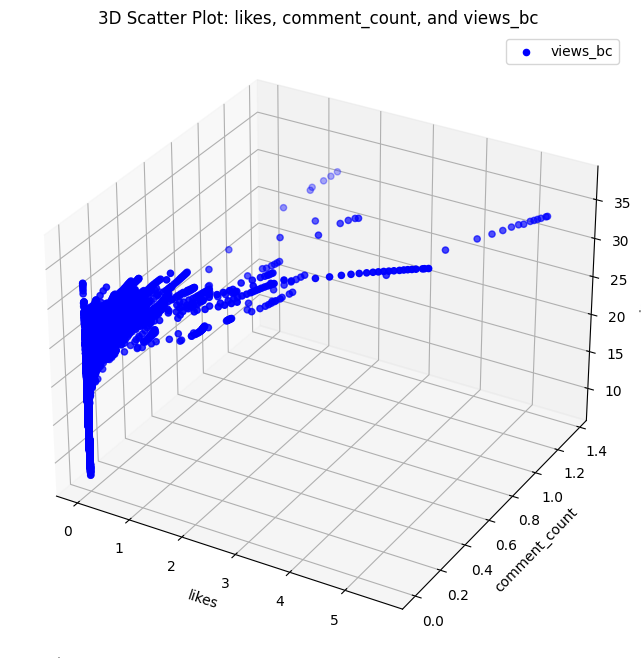

In [34]:
# 3D Plot for MLR with Pop, Child, and Crime (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['likes'], data['comment_count'], y, color='blue', label='views_bc')
ax.set_xlabel('likes')
ax.set_ylabel('comment_count')
ax.set_zlabel('views_bc')
plt.title('3D Scatter Plot: likes, comment_count, and views_bc')
plt.legend()
plt.show()

# Evaluate Model Performance (SLR and MLR)

In [37]:
#R², MSE
print("Simple Linear Regression (SLR):")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")

print("\nMultiple Linear Regression (MLR):")
print(f"R² Score: {r2_score(y, y_mlr):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_mlr):.2f}")

Simple Linear Regression (SLR):
R² Score: 0.26
Mean Squared Error (MSE): 11.28

Multiple Linear Regression (MLR):
R² Score: 0.32
Mean Squared Error (MSE): 10.23


1. The Multiple Linear Regression (MLR) model has a higher R² score (0.32) compared to the Simple Linear Regression (SLR) model (0.26), suggesting that the MLR model is able to explain a larger proportion of the variation in the target variable.
2. The MLR model also has a lower Mean Squared Error (MSE) of 10.23, compared to the SLR model's MSE of 11.28, indicating that the MLR model has a better fit to the data and provides more accurate predictions.

### Statistical Analysis

The statsmodels to get AIC, BIC, p-values, t-tests, and F-test
Add a constant to the predictors for statsmodels to include an intercept

In [38]:
# The statsmodels to get AIC, BIC, p-values, t-tests, and F-test
# Add a constant to the predictors for statsmodels to include an intercept
X_slr_const = sm.add_constant(X)
X_mlr_const = sm.add_constant(X_mlr)

In [39]:
# Fit SLR model in statsmodels
sm_slr_model = sm.OLS(y, X_slr_const).fit()
print("\nSimple Linear Regression (SLR) Summary:")
print(sm_slr_model.summary())


Simple Linear Regression (SLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                 1.438e+04
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:36:27   Log-Likelihood:            -1.0750e+05
No. Observations:               40949   AIC:                         2.150e+05
Df Residuals:                   40947   BIC:                         2.150e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [40]:
# Fit MLR model in statsmodels
sm_mlr_model = sm.OLS(y, X_mlr_const).fit()
print("\nMultiple Linear Regression (MLR) Summary:")
print(sm_mlr_model.summary())


Multiple Linear Regression (MLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     6488.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:36:29   Log-Likelihood:            -1.0570e+05
No. Observations:               40949   AIC:                         2.114e+05
Df Residuals:                   40945   BIC:                         2.115e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    